In [3]:
#### Preamble ####
# Purpose: Explore some potential relationships among the variables of the dataset
# Author: Jiazhou(Justin) Bi and Weiyang Li
# Date: 7 October 2024
# Contact: justin.bi@mail.utoronto.ca or weiyang.li@mail.utoronto.ca
# License: MIT
# Pre-requisites: python 3.10.5 or above, with pandas, numpy, matplotlib, and sklearn installed for python
# Any other information needed? None

# Loading the Dataset and Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/02-analysis_data/cleaned_data.csv')
df.head()

,STATEICP,GQ,OWNERSHP,MORTGAGE,SEX,AGE,MARST,EDUC,SCHLTYPE,OCC2010,IND1990,INCTOT,VETSTAT,EDUC_new
0,41,3,0,0,2,85,5,7,1,9920,0,18800,1,4
1,41,3,0,0,1,51,5,6,1,5620,591,12500,1,3
2,41,3,0,0,2,36,6,2,1,8800,100,16400,1,2
3,41,4,0,0,1,74,6,0,1,9920,0,8600,1,0
4,41,3,0,0,1,49,4,7,1,6230,60,5000,2,4


# Total Income Distribution

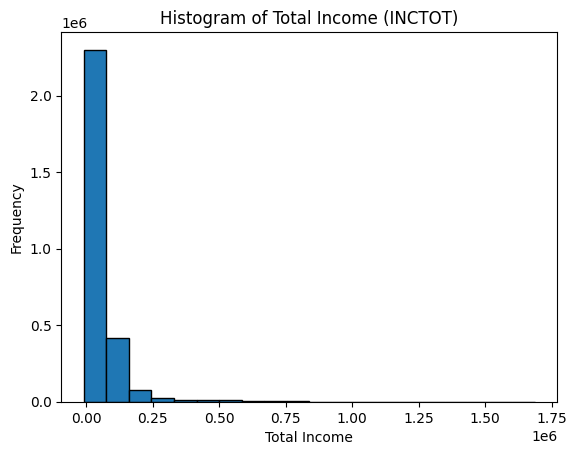

In [64]:
plt.hist(df['INCTOT'], bins=20, edgecolor='black')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Histogram of Total Income (INCTOT)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff0d8762e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff0d8762700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff0d8762490>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff0d8768700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0d8768160>],
 'means': []}

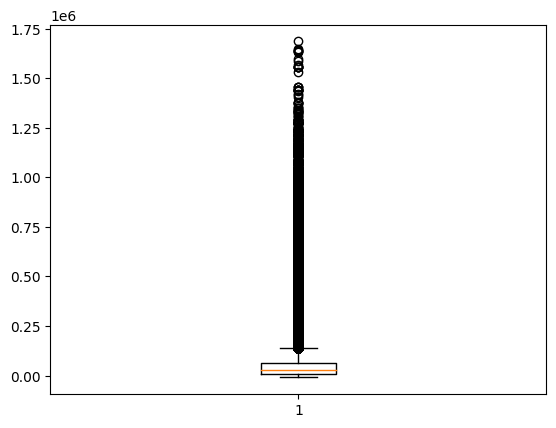

In [65]:
plt.boxplot(df['INCTOT'])

In [67]:
upper_outliers_INCTOT = df[df['INCTOT'] >= 1000000]
upper_outliers_INCTOT

,STATEICP,GQ,OWNERSHP,MORTGAGE,SEX,AGE,MARST,EDUC,SCHLTYPE,OCC2010,IND1990,INCTOT,VETSTAT,EDUC_new
39653,41,1,1,1,1,71,1,10,1,10,141,1084000,1,4
65053,61,1,1,1,1,73,1,11,1,120,511,1071000,1,5
79330,61,1,2,0,1,51,1,11,1,10,432,1003000,1,5
85440,61,1,1,3,1,77,1,11,1,3060,831,1167800,2,5
91726,61,1,1,3,1,54,1,10,1,4920,712,1033000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773304,73,1,1,1,1,67,1,8,1,10,502,1030500,1,4
2775227,73,1,1,3,1,43,1,11,1,3060,850,1018000,1,5
2775793,73,1,1,3,1,71,1,11,1,20,362,1077600,1,5
2777363,73,1,1,3,1,52,1,10,1,430,732,1018000,1,4


In [68]:
mean_INCTOT = df['INCTOT'].mean()
mean_INCTOT

49422.73825908559

# Boxplot: mortgage vs income

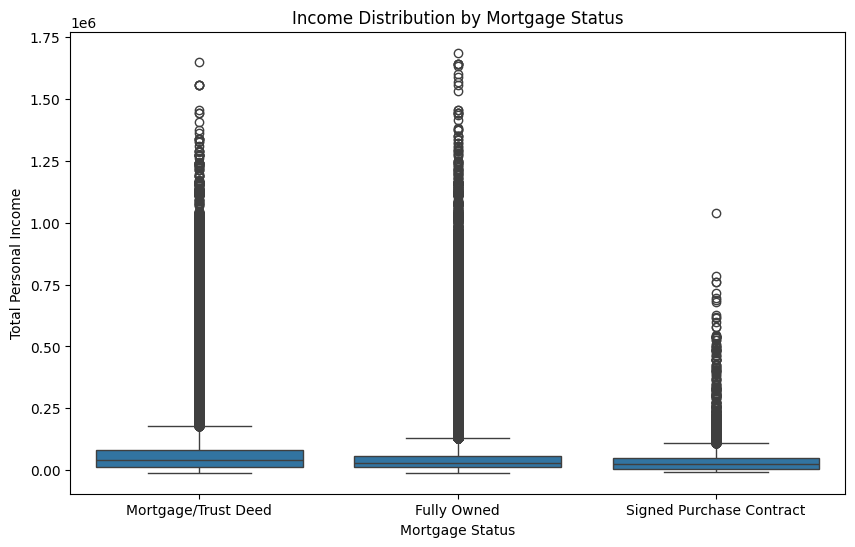

In [76]:
# Mapping the mortgage status codes to descriptive labels
mortgage_labels = {
    1: 'Fully Owned',
    2: 'Other (Possibly Yes)',
    3: 'Mortgage/Trust Deed',
    4: 'Signed Purchase Contract'
}

# Replace the mortgage codes with descriptive labels in a new column
df_filtered['MORTGAGE_LABEL'] = df['MORTGAGE'].map(mortgage_labels)

# Boxplot for Income by Mortgage Status with descriptive x-axis labels
plt.figure(figsize=(10,6))
sns.boxplot(x='MORTGAGE_LABEL', y='INCTOT', data=df_filtered)
plt.title('Income Distribution by Mortgage Status')
plt.xlabel('Mortgage Status')
plt.ylabel('Total Personal Income')
plt.show()

# Correlation Analysis

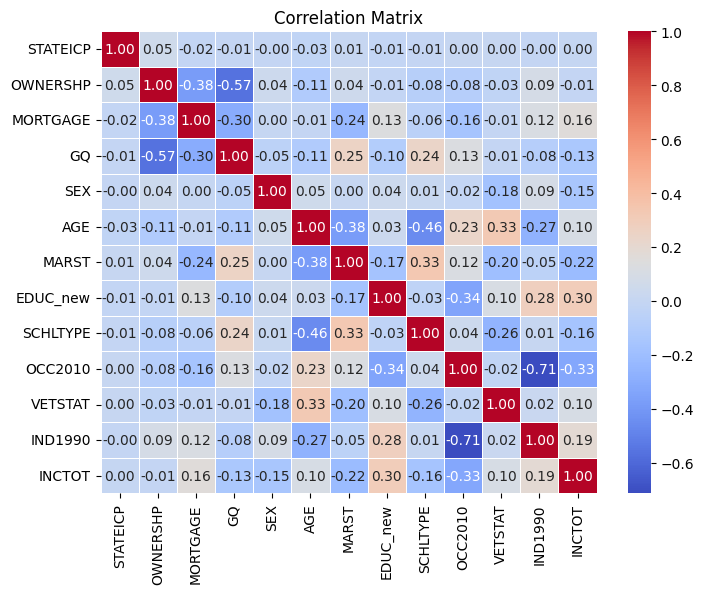

In [70]:
# Select variables
vars = ["STATEICP", "OWNERSHP","MORTGAGE","GQ","SEX","AGE","MARST","EDUC_new","SCHLTYPE","OCC2010","VETSTAT","IND1990","INCTOT"]

# Compute correlation matrix
correlation_matrix = df[vars].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Interaction Analysis: Education and Sex on Income

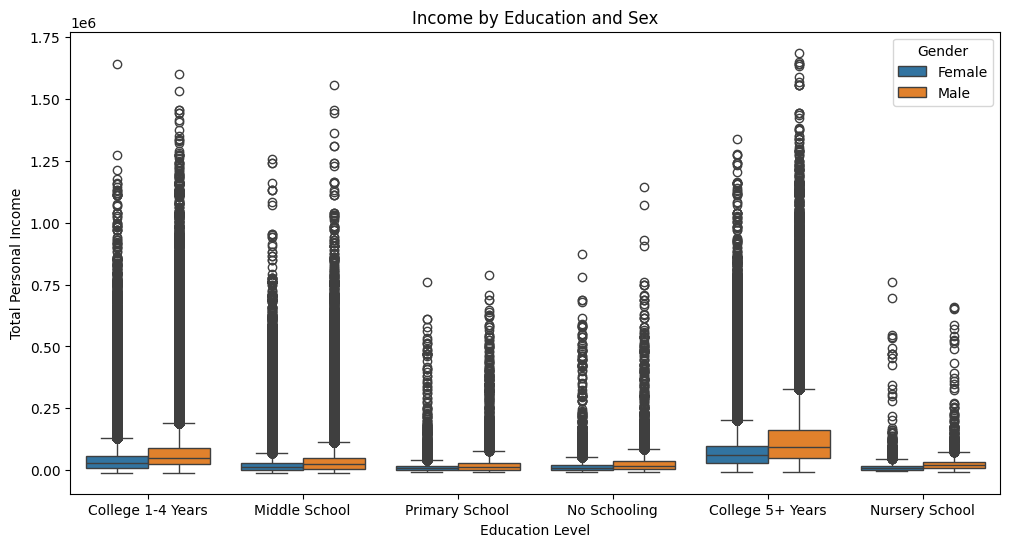

In [74]:
# Note: Gender may influence how education affects income. There are often gender wage gaps, even at similar education levels.

# Mapping the mortgage status codes to descriptive labels
educ_labels = {
    0: 'No Schooling',
    1: 'Nursery School',
    2: 'Primary School',
    3: 'Middle School',
    4: 'College 1-4 Years',
    5: 'College 5+ Years'
}

# Mapping the SEX variable to more descriptive labels
sex_labels = {1: 'Male', 2: 'Female'}

# Replace the EDUC codes with descriptive labels in a new column
df_filtered['EDUC_LABEL'] = df_filtered['EDUC_new'].map(educ_labels)


# Replace the SEX codes with descriptive labels in a new column
df_filtered['SEX_LABEL'] = df_filtered['SEX'].map(sex_labels)


plt.figure(figsize=(12,6))
sns.boxplot(x='EDUC_LABEL', y='INCTOT', hue='SEX_LABEL', data=df_filtered)
plt.title('Income by Education and Sex')
plt.xlabel('Education Level')
plt.ylabel('Total Personal Income')
plt.legend(title='Gender')
plt.show()

# VIF Analysis

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Convert categorical variables to dummy variables
df_vif = pd.get_dummies(df_filtered[['STATEICP', 'OWNERSHP', 'MORTGAGE', 'GQ', 'SEX', 'AGE', 
                                     'MARST', 'EDUC_new', 'SCHLTYPE', 'OCC2010', 'VETSTAT', 'IND1990']], drop_first=True)

# Add a constant term to the model (intercept)
df_vif = add_constant(df_vif)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Variable'] = df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# Display the VIF values
print(vif_data)

# Note: all less than 5 (moderate), no need to reduce multicollinearity

    Variable         VIF
0      const  164.951630
1   STATEICP    1.004934
2   OWNERSHP    3.319874
3   MORTGAGE    2.417313
4         GQ    3.161769
5        SEX    1.074353
6        AGE    1.810833
7      MARST    1.375864
8   EDUC_new    1.183132
9   SCHLTYPE    1.404006
10   OCC2010    2.235799
11   VETSTAT    1.223428
12   IND1990    2.150450
